In [5]:
import pandas as pd
data = pd.read_csv('BRAZIL_CITIES_REV2022.CSV')
data

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,RS,0,3665,3665,0,1222,548,674,1525,...,2,0,117198141,1435,400,0,0,0,0,1
5574,Ângulo,PR,0,2859,2844,15,929,737,192,2246,...,0,0,0,898,415,0,0,0,0,1
5575,Érico Cardoso,BA,0,10859,10859,0,2659,542,2117,1999,...,0,0,0,655,1020,0,0,0,0,1
5576,Óbidos,PA,0,49333,49324,9,11263,6068,5195,25295,...,3,0,184494811,938,4985,0,0,0,0,1


In [6]:
data.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       'GVA_TOTAL', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'Pr_

In [7]:
from functools import partial
import numpy as np
from skimage import transform
from skimage import io
import matplotlib.pyplot as plt 
EPS = 1e-66
RESOLUTION = 0.001
num_grids = int(1/RESOLUTION+0.5)

def generate_lut(img):
    """
    linear approximation of CDF & marginal
    :param density_img:
    :return: lut_y, lut_x
    """
    num_grids=img.shape[0]
    RESOLUTION=1/num_grids-0.5
    density_img = transform.resize(img, (num_grids, num_grids))
    x_accumlation = numpy.sum(density_img, axis=1)
    sum_xy = numpy.sum(x_accumlation)
    y_cdf_of_accumulated_x = [[0., 0.]]
    accumulated = 0
    for ir, i in enumerate(range(num_grids-1, -1, -1)):
        accumulated += x_accumlation[i]
        if accumulated == 0:
            y_cdf_of_accumulated_x[0][0] = float(ir+1)/float(num_grids)
        elif EPS < accumulated < sum_xy - EPS:
            y_cdf_of_accumulated_x.append([float(ir+1)/float(num_grids), accumulated/sum_xy])
        else:
            break
    y_cdf_of_accumulated_x.append([float(ir+1)/float(num_grids), 1.])
    y_cdf_of_accumulated_x = numpy.array(y_cdf_of_accumulated_x)

    x_cdfs = []
    for j in range(num_grids):
        x_freq = density_img[num_grids-j-1]
        sum_x = numpy.sum(x_freq)
        x_cdf = [[0., 0.]]
        accumulated = 0
        for i in range(num_grids):
            accumulated += x_freq[i]
            if accumulated == 0:
                x_cdf[0][0] = float(i+1) / float(num_grids)
            elif EPS < accumulated < sum_xy - EPS:
                x_cdf.append([float(i+1)/float(num_grids), accumulated/sum_x])
            else:
                break
        x_cdf.append([float(i+1)/float(num_grids), 1.])
        if accumulated > EPS:
            x_cdf = numpy.array(x_cdf)
            x_cdfs.append(x_cdf)
        else:
            x_cdfs.append(None)

    y_lut = partial(numpy.interp, xp=y_cdf_of_accumulated_x[:, 1], fp=y_cdf_of_accumulated_x[:, 0])
    x_luts = [partial(numpy.interp, xp=x_cdfs[i][:, 1], fp=x_cdfs[i][:, 0]) if x_cdfs[i] is not None else None for i in range(num_grids)]

    return y_lut, x_luts

def sample_2d(lut, N):
    y_lut, x_luts = lut
    u_rv = numpy.random.random((N, 2))
    samples = numpy.zeros(u_rv.shape)
    for i, (x, y) in enumerate(u_rv):
        ys = y_lut(y)
        x_bin = int(ys/RESOLUTION)
        xs = x_luts[x_bin](x)
        samples[i][0] = xs
        samples[i][1] = ys

    return samples

In [8]:
import matplotlib
%matplotlib inline

In [9]:
import os
from skimage import io
import torch
import torch.nn as nn
from torch.autograd import Variable
from sampler import generate_lut, sample_2d
from visualizer import GANDemoVisualizer
from networks import SimpleMLP
from argparser import parse_args
import math
import warnings
warnings.filterwarnings("ignore")
from  scipy.stats import chi2_contingency

In [10]:
def train_gan(density,iterations=301):
    global g_loss
    kl=[]
    DIMENSION = 2
    args = parse_args()
    cuda = False if args.cpu else True
    bs = 2000
    z_dim = args.z_dim 
    lut_2d = generate_lut(density)

    visualizer = GANDemoVisualizer('GDP')

    generator = SimpleMLP(input_size=z_dim, hidden_size=args.g_hidden_size, output_size=DIMENSION)
    discriminator = SimpleMLP(input_size=DIMENSION, hidden_size=args.d_hidden_size, output_size=1)

    if cuda:
        generator.cuda()
        discriminator.cuda()
    criterion = nn.BCELoss()

    d_optimizer = args.optimizer(discriminator.parameters(), lr=args.d_lr)
    g_optimizer = args.optimizer(generator.parameters(), lr=args.d_lr)

    for train_iter in range(iterations):
        for d_index in range(args.d_steps):
            # 1. Train D on real+fake
            discriminator.zero_grad()

            #  1A: Train D on real
            real_samples = sample_2d(lut_2d, bs)
            d_real_data = Variable(torch.Tensor(real_samples))
            if cuda:
                d_real_data = d_real_data.cuda()
            d_real_decision = discriminator(d_real_data)
            labels = Variable(torch.ones(bs))
            if cuda:
                labels = labels.cuda()
            d_real_decision1 = torch.reshape(d_real_decision,(labels.shape))
            d_real_loss = criterion(d_real_decision1, labels)
            #  1B: Train D on fake
            latent_samples = torch.randn(bs, z_dim)
            d_gen_input = Variable(latent_samples)
            if cuda:
                d_gen_input = d_gen_input.cuda()
            d_fake_data = generator(d_gen_input).detach() 
            d_fake_decision = discriminator(d_fake_data)
            labels = Variable(torch.zeros(bs))
            if cuda:
                labels = labels.cuda()

            d_fake_decision1 = torch.reshape(d_fake_decision,(labels.shape))
            d_fake_loss = criterion(d_fake_decision1, labels)  

            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()

            d_optimizer.step()     

        for g_index in range(args.g_steps):

            generator.zero_grad()

            latent_samples = torch.randn(bs, z_dim)
            g_gen_input = Variable(latent_samples)
            if cuda:
                g_gen_input = g_gen_input.cuda()
            g_fake_data = generator(g_gen_input)
            g_fake_decision = discriminator(g_fake_data)
            labels = Variable(torch.ones(bs))
            if cuda:
                labels = labels.cuda()
            g_fake_decision1 = torch.reshape(g_fake_decision,(labels.shape))
            g_loss = criterion(g_fake_decision1, labels) 

            g_loss.backward()
            g_optimizer.step()

        gen_samples = g_fake_data.data.cpu().numpy() if cuda else g_fake_data.data.numpy()
        gen_density=get_density(gen_samples.T,size)
        KL=0
        for i in range(density.shape[0]):
            for j in range(density.shape[1]):
                if density[i][j]==0:
                    continue
                if gen_density[i][j]==0:
                    continue
                KL += density[i][j]*math.log(density[i][j]/gen_density[i][j])
        kl.append(KL+30/(train_iter+5))
        if train_iter % 100 == 0:


            loss_d_real = d_real_loss.data.cpu().numpy() if cuda else d_real_loss.data.numpy()
            loss_d_fake = d_fake_loss.data.cpu().numpy() if cuda else d_fake_loss.data.numpy()
            loss_g = g_loss.data.cpu().numpy() if cuda else g_loss.data.numpy()
            gen_samples = g_fake_data.data.cpu().numpy() if cuda else g_fake_data.data.numpy()
            gen_density=get_density(gen_samples.T,size)


            msg = 'Iteration {}: D_loss(real/fake): {:.6g}/{:.6g} G_loss: {:.6g}'.format(train_iter, loss_d_real, loss_d_fake, loss_g)


            visualizer.draw(real_samples, gen_samples, msg,)
            visualizer.show()
    plt.figure(figsize=(9,6))
    plt.plot(kl)
    plt.xlabel('epoch')
    plt.ylabel('kl score')
    return gen_samples

In [11]:
def get_density(data,size=50):
    data_1=data[0]
    data_2=data[1]
    density=np.zeros((size+1,size+1))
    dis_1=np.max(data_1)
    dis_2=np.max(data_2)

    data_1=data_1/dis_1*size
    data_1=data_1.astype('int')
    data_2=data_2/dis_2*size
    data_2=data_2.astype('int')
    for i in range(len(data_1)):
        density[-data_1[i]][data_2[i]] += 1
    density = density/(density.shape[0]**2)
    density=np.round(density,num_acc) 
    return density

In [12]:
feature=['GDP','IBGE_RES_POP','TAXES']

generating GDP & IBGE_RES_POP ......


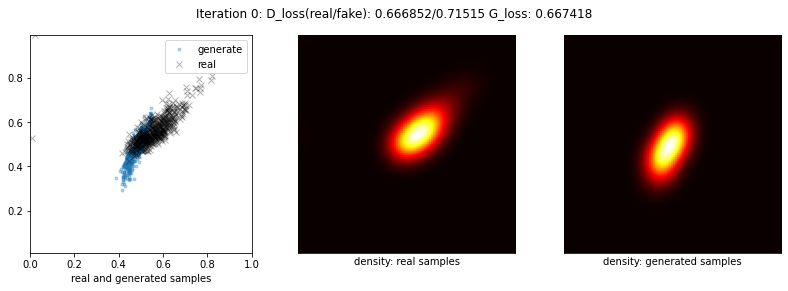

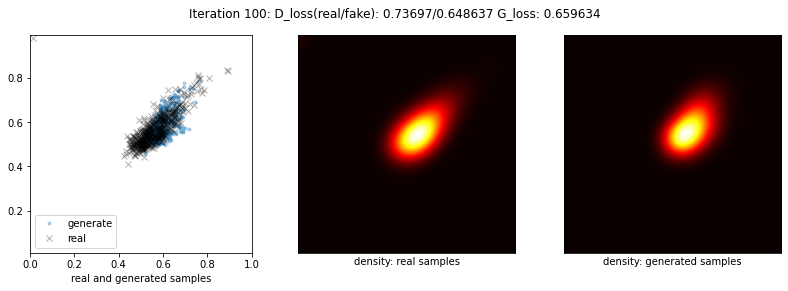


Kullback-Leibler Divergence: 2.6322001042141996
KL score confidence interval: 2.6219327329131197 2.6424674755152795

Chi-Square result 
GDP & IBGE_RES_POP Chi-square=2.4762, p-value=1.0000, degree of freedom=209 


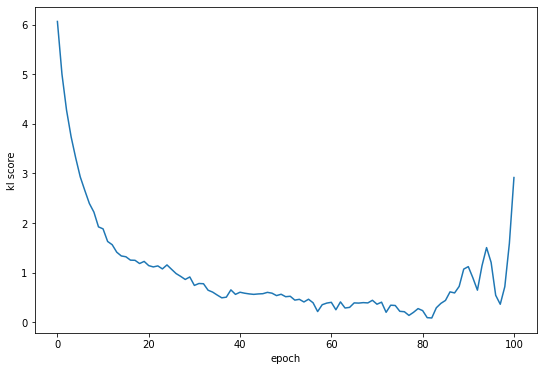

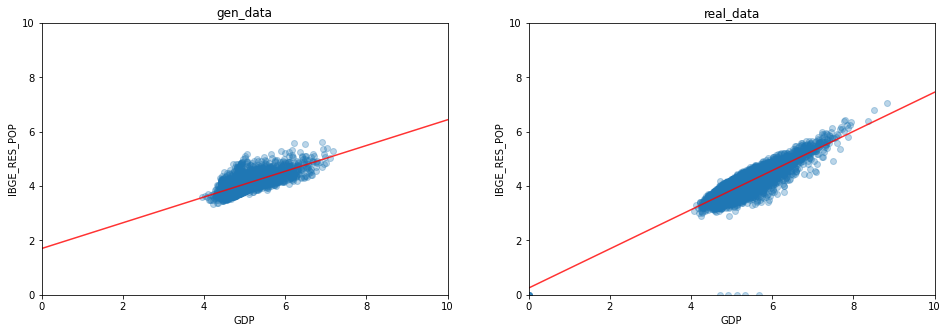

real_intercept: 0.2499988420010668  interval: ( 0.24752390178056025 0.25247378222157335 )
real_coef: 0.7202503229935103  interval: ( 0.7201642045652811 0.7203364414217396 )
gen_intercept: 1.7037032  interval: ( 1.6945912966039032 1.7128150335047394 )
gen_coef: 0.47358465  interval: ( 0.473236785219342 0.473932518674701 )


In [33]:
import random
for k in range(len(feature)):
    for t in range(k+1,len(feature)):
        print('='*40)
        print('generating',feature[k] ,'&',feature[t],'......')
        print('='*40)
        data_1=np.array(data[feature[k]]).astype('float')
        data_2=np.array(data[feature[t]]).astype('float')
        num_acc=10
        for i in range(len(data_1)):
            if data_1[i]<=1:
                data_1[i]=0
            else:
                data_1[i]=math.log(data_1[i],10)
            if data_2[i]<=1:
                data_2[i]=0
            else:
                data_2[i]=math.log(data_2[i],10)

        size=40
        
        density=get_density([data_1,data_2],size)
        
        gen_samples = train_gan(density,101)#epoch
        
        gen_density=get_density(gen_samples.T,size)

        KL=[]
        for i in range(density.shape[0]):
            for j in range(density.shape[1]):
                if density[i][j]==0:
                    continue
                if gen_density[i][j]==0:
                    continue
                KL.append(density[i][j]*math.log(density[i][j]/gen_density[i][j]))
        print('\nKullback-Leibler Divergence:',np.sum(KL))
        print('KL score confidence interval:',np.sum(KL)-np.var(KL),np.sum(KL)+np.var(KL))
        Feature = list(np.array([density.reshape(-1), gen_density.reshape(-1)]).T)
        n=0
        while n<len(Feature):
            if Feature[n][0]==0 and Feature[n][1]==0:
                Feature.pop(n)
                continue
            else:
                n+=1
        Feature = np.array(Feature).T
        f1=Feature.astype('float')
        df = pd.DataFrame(f1)
        kt= chi2_contingency(df)
        print('\nChi-Square result ')
        print(feature[k],'&',feature[t],'Chi-square=%.4f, p-value=%.4f, degree of freedom=%i '%kt[:3])

        from sklearn.linear_model import LinearRegression


        gen_y=gen_samples[:,0]*np.max(data_2)
        gen_x=gen_samples[:,1]*np.max(data_1)
        gen_model= LinearRegression()
        gen_model.fit(gen_x.reshape(-1, 1),gen_y)
        x=np.linspace(0, 10, 100).reshape(-1, 1)
        y=gen_model.predict(x)

        plt.figure(figsize=(16,5))
        plt.subplot(1,2,1)
        plt.scatter(gen_x,gen_y,alpha=0.3)
        plt.plot(x,y,c='r',alpha=0.8)
        plt.title('gen_data')
        plt.xlabel(feature[k])
        plt.ylabel(feature[t])
        plt.axis([0,10,0,10])



        real_model= LinearRegression()
        real_model.fit(data_1.reshape(-1, 1),data_2)
        x=np.linspace(0, 10, 100).reshape(-1, 1)
        y=real_model.predict(x)
        plt.subplot(1,2,2)
        plt.scatter(data_1,data_2,alpha=0.3)
        plt.plot(x,y,c='r',alpha=0.8)
        plt.title('real_data')
        plt.xlabel(feature[k])
        plt.ylabel(feature[t])
        plt.axis([0,10,0,10])
        plt.show()
        
        R=[[],[]]
        G=[[],[]]
        R_data=np.array([data_1,data_2]).T
        G_data=np.array([gen_x,gen_y]).T
        for num in range(100):
            sample_r=sample_r=R_data[random.sample(range(0, len(R_data)),int(len(R_data)*0.5))].T
            model= LinearRegression()
            model.fit(sample_r[0].reshape(-1, 1),sample_r[1])
            R[0].append(model.intercept_)
            R[1].append(model.coef_[0])
            
            sample_g=G_data[random.sample(range(0, len(G_data)),int(len(G_data)*0.5))].T
            model= LinearRegression()
            model.fit(sample_g[0].reshape(-1, 1),sample_g[1])
            G[0].append(model.intercept_)
            G[1].append(model.coef_[0])
            
        print('real_intercept:',real_model.intercept_,' interval: (',real_model.intercept_-3*np.var(R[0]),real_model.intercept_+3*np.var(R[0]),')')
        print('real_coef:',real_model.coef_[0],' interval: (',real_model.coef_[0]-3*np.var(R[1]),real_model.coef_[0]+3*np.var(R[1]),')')
        print('gen_intercept:',gen_model.intercept_,' interval: (',gen_model.intercept_-3*np.var(G[0]),gen_model.intercept_+3*np.var(G[0]),')')
        print('gen_coef:',gen_model.coef_[0],' interval: (',gen_model.coef_[0]-3*np.var(G[1]),gen_model.coef_[0]+3*np.var(G[1]),')')
        
        gen_1 = 10**gen_x
        gen_2 = 10**gen_y
        Df = pd.DataFrame(np.array([gen_1,gen_2]).T,columns=[feature[k],feature[t]])
        Df.to_csv('generate_data/'+feature[k]+'&'+feature[t]+'.csv')
        break
    break
    

In [19]:

sample_r=R_data[random.sample(range(0, len(R_data)),int(len(R_data)*0.8))]

In [20]:
R_data.shape

(5578, 2)

In [21]:
sample_r.shape

(4462, 2)

In [30]:
np.var(R[0])

0.0010419721321766938

In [28]:
R[0]

[0.2396167370335318,
 0.25091648585796555,
 0.23911188799982108,
 0.2350115071494545,
 0.2165232373748367,
 0.2341968166325894,
 0.22997515107107702,
 0.24278475307978153,
 0.27033268232345,
 0.2352310363695964,
 0.27268922657064376,
 0.2487354594359572,
 0.25503481091656255,
 0.23844194978438082,
 0.2698914974334943,
 0.23808974590035792,
 0.24500778421082092,
 0.2482954623082403,
 0.24678061024866205,
 0.24929296238743115,
 0.2506420319458953,
 0.22876421011273562,
 0.22748188305255823,
 0.2276804362781042,
 0.2395236873450277,
 0.2518946029499025,
 0.2302188269770249,
 0.26904676088463253,
 0.2537775281892851,
 0.22529306786731773,
 0.2339982698035712,
 0.2820469442131208,
 0.24868581453918415,
 0.2535663777103001,
 0.2808625993487688,
 0.2568402124889313,
 0.2561957218353945,
 0.2507255700988402,
 0.25668328659438666,
 0.2547222831214513,
 0.2569031678877107,
 0.25340816790868637,
 0.2564469187551488,
 0.24467737559188452,
 0.23681545119374592,
 0.2555732101712054,
 0.2485461897690